In [1]:
#!wget https://huggingface.co/datasets/david4096/wildbio/resolve/main/benchmark_lg_embed-distance-small.pkl
import pickle
with open('benchmark_96009_embed-distance.pkl', 'rb') as f:  # Open file in write-binary mode
   bdx = pickle.load(f) 

# this is the original dataset with added fields
# original question
bdx[168]['conversation'][0]
# original response
bdx[168]['conversation'][0]
# dictionary of LLM responses
bdx[168]['compare']
# dictionary of levenshtein distances
bdx[168]['response-ldistances']
# levenshtein similarity calculation to original response
bdx[168]['response-similarity']
# embedding of prompt
bdx[168]['prompt-embed']
#embedding of original response
bdx[168]['response-embed']
# dictionary of embeddings for responses
bdx[168]['embeddings']
# distance in embedding space to original response
bdx[168]['response-sdistances']


{'gpt-35-turbo': np.float32(-0.16393547),
 'gpt-4o': np.float32(-0.22431158),
 'gpt-4': np.float32(-0.084557414),
 'claude3opus': np.float32(-0.32143763),
 'claude3sonnet5': np.float32(-0.26128024),
 'claude3sonnet': np.float32(0.42277068),
 'claude3haiku': np.float32(-0.018462598),
 'commandrplus': np.float32(-0.054872647),
 'commandrbasic': np.float32(-0.13524169),
 'llamallama3-70b': np.float32(1.6736692),
 'llamallama3-8b': np.float32(-0.12971321),
 'llamallama2-70b': np.float32(0.055728346),
 'llamallama2-13b': np.float32(0.39503032),
 'mistralmistral-7b': np.float32(-0.2246772),
 'mistralmixtral-8x7b': np.float32(-0.07445856),
 'mistralmistral-large': np.float32(0.14975908)}

In [2]:
i = 0
for row in bdx:
    if row.get('embeddings', {}) != {}:
        i+=1
print(i)

571


In [3]:
len(bdx)

350867

In [100]:
dataset= bdx

In [4]:
!pip install matplotlib

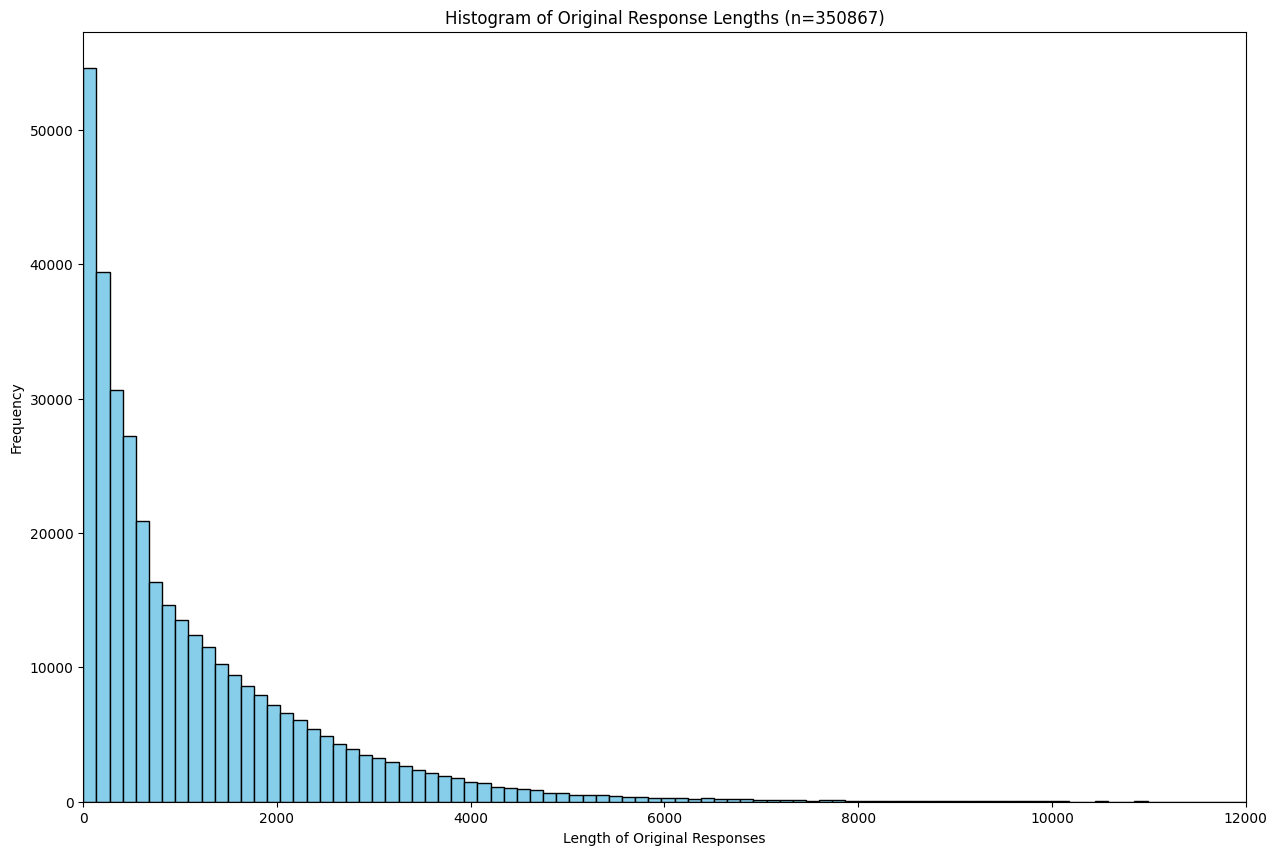

In [5]:
import matplotlib.pyplot as plt

total_items = len(bdx)

# Calculate the lengths of the original responses
response_lengths = [len(item['conversation'][1]['content']) for item in bdx]

# Plot a histogram of response lengths with x-axis limited to 8000
plt.figure(figsize=(15, 10))
plt.hist(response_lengths, bins=200, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Original Response Lengths (n={total_items})')
plt.xlabel('Length of Original Responses')
plt.ylabel('Frequency')
plt.xlim(0, 12000)  # Set the x-axis limit to a maximum of 8000
plt.show()


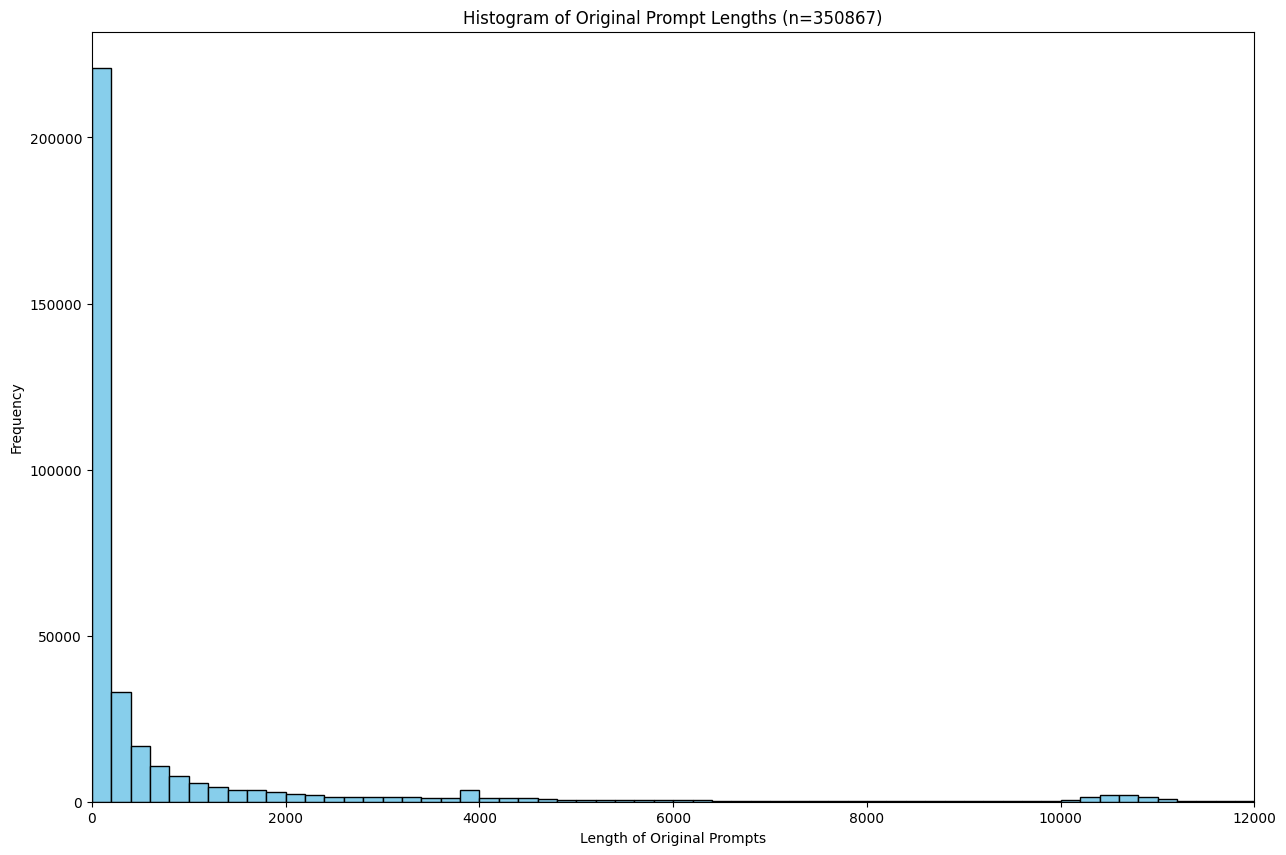

In [6]:
import matplotlib.pyplot as plt

# Calculate the lengths of the original responses
response_lengths = [len(item['conversation'][0]['content']) for item in bdx]

# Plot a histogram of response lengths with x-axis limited to 8000
plt.figure(figsize=(15, 10))
plt.hist(response_lengths, bins=250, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Original Prompt Lengths (n={total_items})')
plt.xlabel('Length of Original Prompts')
plt.ylabel('Frequency')
plt.xlim(0, 12000)  # Set the x-axis limit to a maximum of 8000
plt.show()


In [7]:
print(bdx[168]['embeddings'].keys())

dict_keys(['gpt-35-turbo', 'gpt-4o', 'gpt-4', 'claude3opus', 'claude3sonnet5', 'claude3sonnet', 'claude3haiku', 'commandrplus', 'commandrbasic', 'llamallama3-70b', 'llamallama3-8b', 'llamallama2-70b', 'llamallama2-13b', 'mistralmistral-7b', 'mistralmixtral-8x7b', 'mistralmistral-large'])


In [8]:


filtered_bdx = [b for b in bdx if b.get('embeddings', {}) != {}]
len(filtered_bdx)

571

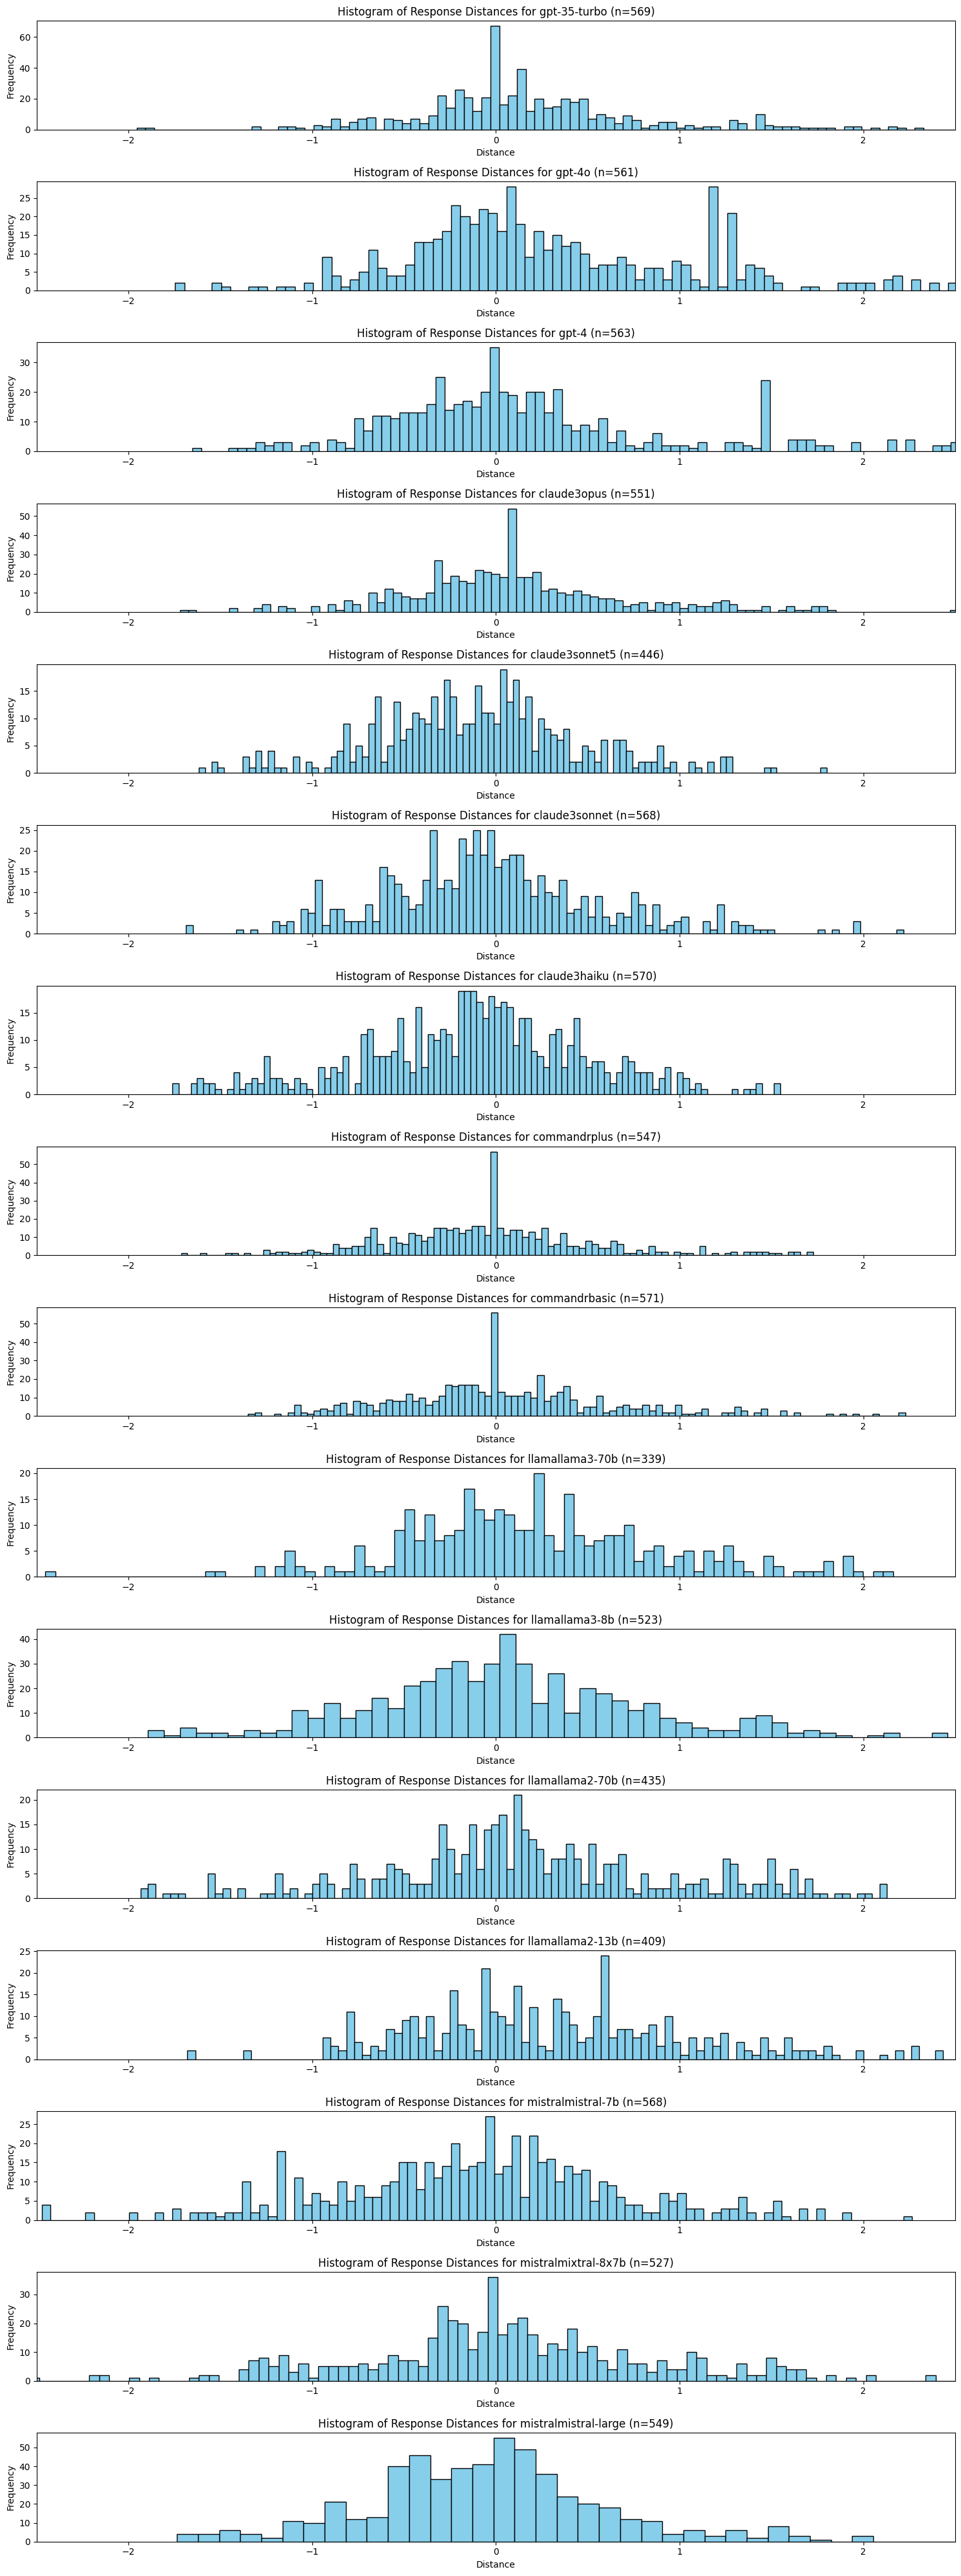

In [9]:
def plot_separate_histograms_for_models(dataset, key_name, title_prefix, xlim_min, xlim_max, figsize=(12, 3), output_file=None):
    models = dataset[0][key_name].keys()  # Get model names from the first entry's dictionary
    num_models = len(models)
    
    # Create a figure with subplots for each model
    fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=figsize, sharex=False, sharey=False)
    fig.tight_layout(pad=3.0)  # Add padding between plots
    
    for i, model in enumerate(models):
        distances = [item[key_name][model] for item in dataset if model in item[key_name]]
        
        # Plot histogram for the current model
        axes[i].hist(distances, bins=100, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{title_prefix} for {model} (n={len(distances)})')
        axes[i].set_xlabel('Distance')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlim(xlim_min, xlim_max)
        axes[i].tick_params(axis='y', which='both', labelsize=10)  # Set y-axis tick size
    
    # Adjust layout
    plt.tight_layout()
    
    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage
plot_separate_histograms_for_models(
    dataset=filtered_bdx, 
    key_name='response-sdistances', 
    title_prefix='Histogram of Response Distances', 
    xlim_min=-2.5,
    xlim_max=2.5, 
    figsize=(15, 40),  # Adjust the size as needed
    output_file='histograms.png'  # Specify a filename to save the plot
)


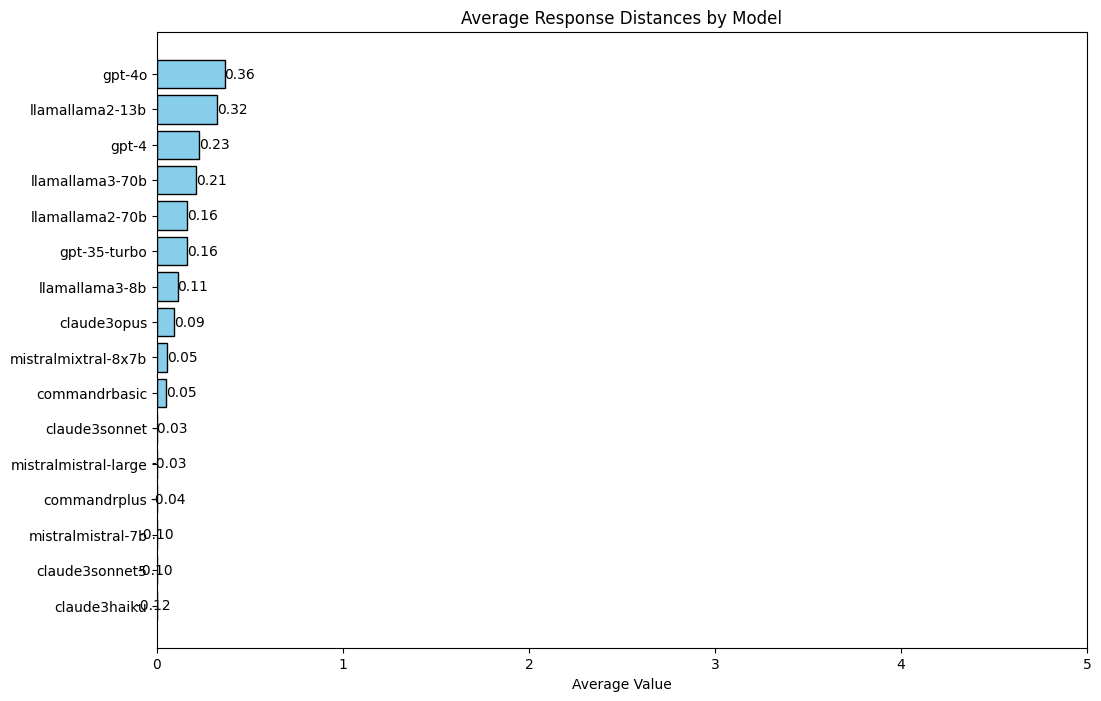

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_bar_chart(dataset, key_name, title, xlim_max=None, figsize=(10, 6), output_file=None):
    models = dataset[0][key_name].keys()  # Get model names from the first entry's dictionary
    averages = {}
    
    # Calculate average for each model
    for model in models:
        values = [np.mean(item[key_name][model]) for item in dataset if model in item[key_name]]
        if values:  # Ensure there are values to average
            averages[model] = np.mean(values)
    
    # Sort models by average value
    sorted_models = sorted(averages.items(), key=lambda x: x[1])
    models_sorted, averages_sorted = zip(*sorted_models)
    
    # Plot bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(models_sorted, averages_sorted, color='skyblue', edgecolor='black')
    plt.xlabel('Average Value')
    plt.title(title)
    
    # Set x-axis limit if specified
    if xlim_max is not None:
        plt.xlim(0, xlim_max)
    
    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage
plot_average_bar_chart(
    dataset=filtered_bdx, 
    key_name='response-sdistances', 
    title='Average Response Distances by Model', 
    xlim_max=5,  # Adjust as needed
    figsize=(12, 8),  # Adjust the size as needed
    output_file='average_response_distances.png'  # Specify a filename to save the plot
)


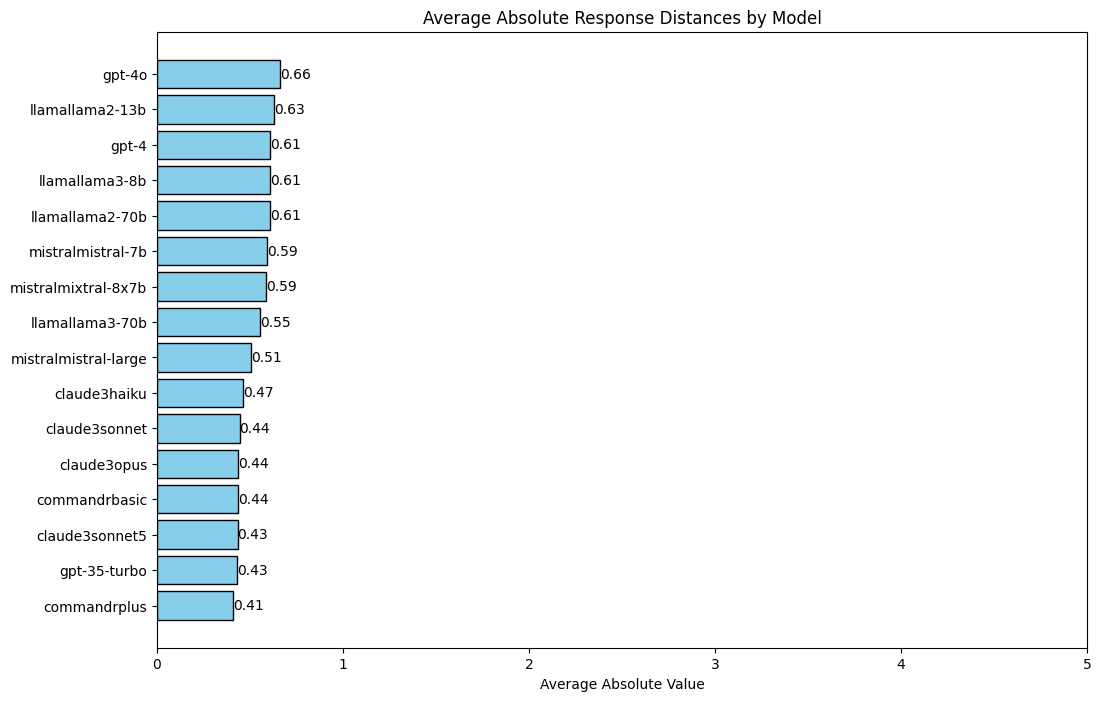

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_abs_bar_chart(dataset, key_name, title, xlim_max=None, figsize=(10, 6), output_file=None):
    models = dataset[0][key_name].keys()  # Get model names from the first entry's dictionary
    averages = {}
    
    # Calculate average of absolute values for each model
    for model in models:
        all_values = []
        for item in dataset:
            if model in item[key_name]:
                # Directly append the absolute value
                abs_value = np.abs(item[key_name][model])
                all_values.append(abs_value)
        
        if all_values:  # Ensure there are values to average
            averages[model] = np.mean(all_values)
    
    # Sort models by average absolute value
    sorted_models = sorted(averages.items(), key=lambda x: x[1])
    models_sorted, averages_sorted = zip(*sorted_models)
    
    # Plot bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(models_sorted, averages_sorted, color='skyblue', edgecolor='black')
    plt.xlabel('Average Absolute Value')
    plt.title(title)
    
    # Set x-axis limit if specified
    if xlim_max is not None:
        plt.xlim(0, xlim_max)
    
    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage
plot_average_abs_bar_chart(
    dataset=filtered_bdx, 
    key_name='response-sdistances', 
    title='Average Absolute Response Distances by Model', 
    xlim_max=5,  # Adjust as needed
    figsize=(12, 8),  # Adjust the size as needed
    output_file='average_abs_response_distances.png'  # Specify a filename to save the plot
)


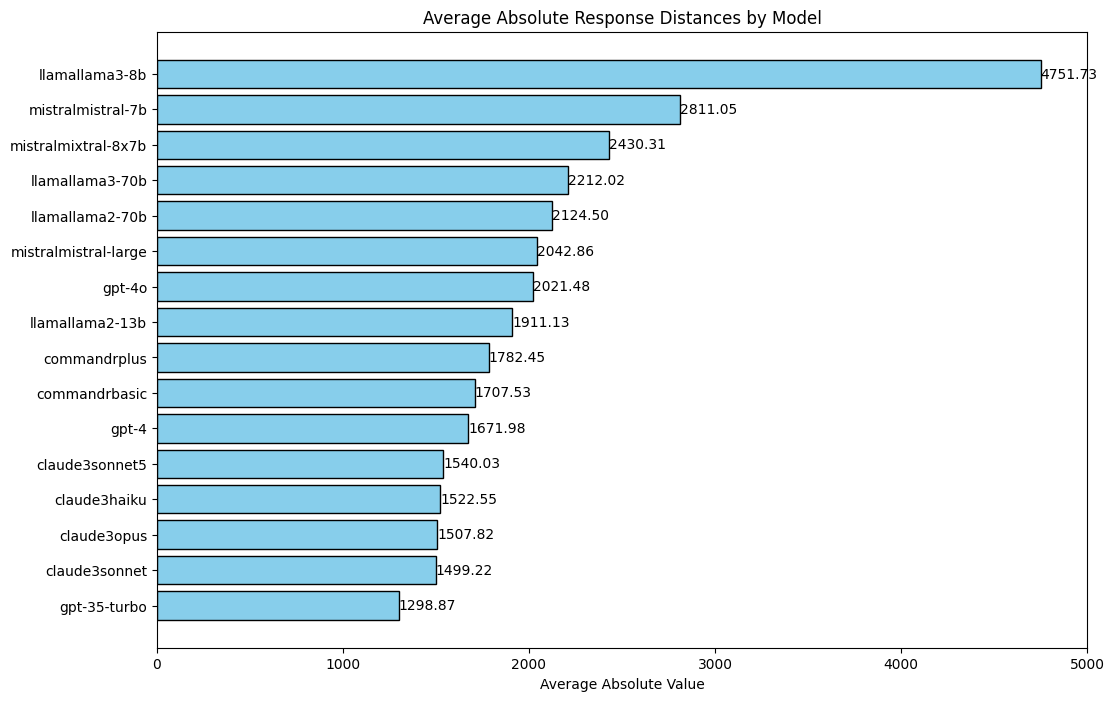

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_abs_bar_chart(dataset, key_name, title, xlim_max=None, figsize=(10, 8), output_file=None):
    models = dataset[0][key_name].keys()  # Get model names from the first entry's dictionary
    averages = {}
    
    # Calculate average of absolute values for each model
    for model in models:
        all_values = []
        for item in dataset:
            if model in item[key_name]:
                # Directly append the absolute value
                abs_value = np.abs(item[key_name][model])
                if isinstance(abs_value, np.ndarray):
                    all_values.extend(abs_value)
                else:
                    all_values.append(abs_value)
        
        if all_values:  # Ensure there are values to average
            averages[model] = np.mean(all_values)
    
    # Sort models by average absolute value
    sorted_models = sorted(averages.items(), key=lambda x: x[1])
    models_sorted, averages_sorted = zip(*sorted_models)
    
    # Plot bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(models_sorted, averages_sorted, color='skyblue', edgecolor='black')
    plt.xlabel('Average Absolute Value')
    plt.title(title)
    
    # Set x-axis limit if specified
    if xlim_max is not None:
        plt.xlim(0, xlim_max)
    
    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage
plot_average_abs_bar_chart(
    dataset=filtered_bdx, 
    key_name='response-ldistances', 
    title='Average Absolute Response Distances by Model', 
    xlim_max=5000,  # Adjust as needed
    figsize=(12, 8),  # Adjust the size as needed
    output_file='average_abs_response_ldistances.png'  # Specify a filename to save the plot
)


In [13]:
!pip install seaborn

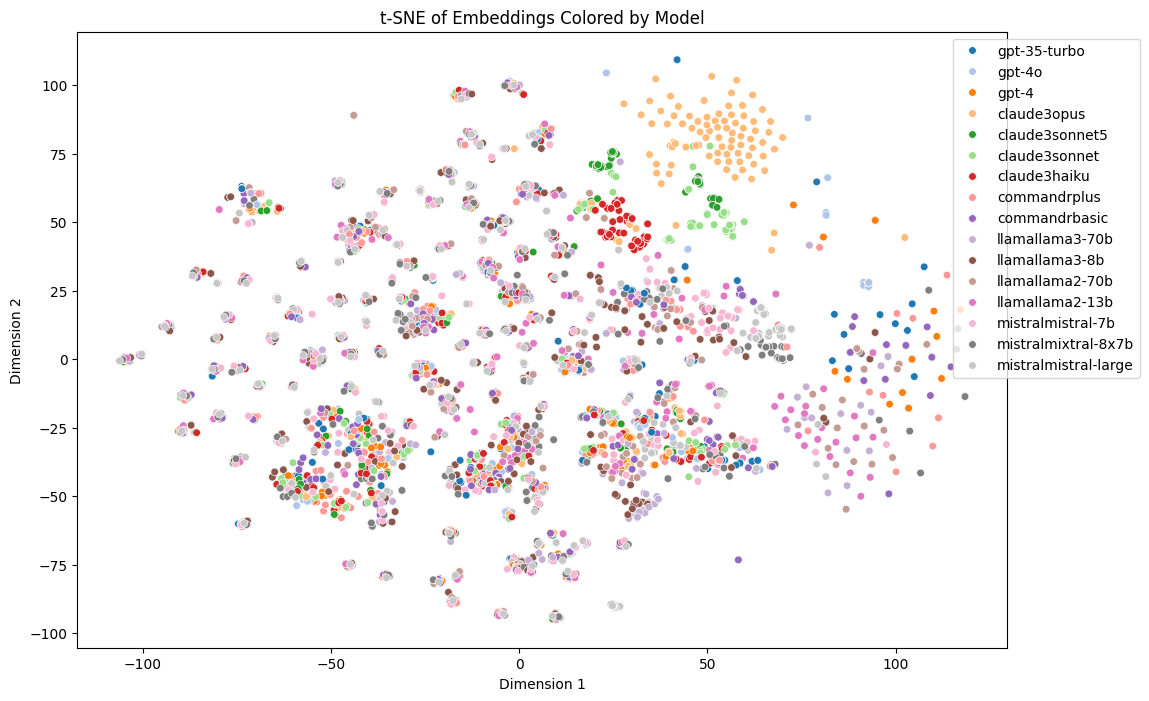

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def plot_tsne_embeddings(dataset, key_name, output_file=None):
    # Extract embeddings and model labels
    embeddings = []
    labels = []
    
    for item in dataset:
        for model, embedding in item[key_name].items():
            if isinstance(embedding, np.ndarray):
                embeddings.append(embedding)
                labels.append(model)
    
    embeddings = np.array(embeddings)
    labels = np.array(labels)
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    
    # Create a DataFrame for plotting
    import pandas as pd
    df = pd.DataFrame({
        'Dimension 1': embeddings_2d[:, 0],
        'Dimension 2': embeddings_2d[:, 1],
        'Model': labels
    })
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Dimension 1', y='Dimension 2', hue='Model', palette='tab20', s=30)
    plt.title('t-SNE of Embeddings Colored by Model')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage
plot_tsne_embeddings(
    dataset=filtered_bdx,
    key_name='embeddings',  # or 'embeddings' depending on how your data is structured
    output_file='tsne_embeddings.png'
)


In [15]:
filtered_bdx[0]['embeddings']

{'gpt-35-turbo': array([ 1.0161173 ,  0.06950815,  0.33613414, ..., -0.23636612,
        -0.17619997, -0.35774896], dtype=float32),
 'gpt-4o': array([ 1.0832019 , -0.00149222,  0.17910713, ..., -0.22449012,
        -0.04011326, -0.43206134], dtype=float32),
 'gpt-4': array([ 1.1079971 ,  0.04646725,  0.0686691 , ..., -0.14486308,
        -0.01738557, -0.35037416], dtype=float32),
 'claude3opus': array([ 0.9622399 ,  0.1768285 ,  0.2462448 , ..., -0.3603405 ,
        -0.20951925, -0.3214788 ], dtype=float32),
 'claude3sonnet5': array([ 0.88532794,  0.19255748,  0.3283757 , ..., -0.1722877 ,
        -0.01614617, -0.47578776], dtype=float32),
 'claude3sonnet': array([ 1.040865  ,  0.00348483, -0.05517872, ..., -0.38709497,
        -0.09514493, -0.4022744 ], dtype=float32),
 'claude3haiku': array([ 0.97457534,  0.09814967,  0.31173503, ..., -0.25217313,
        -0.1657474 , -0.40076426], dtype=float32),
 'commandrplus': array([ 1.1071851 ,  0.20342763,  0.1205118 , ..., -0.18930642,
      

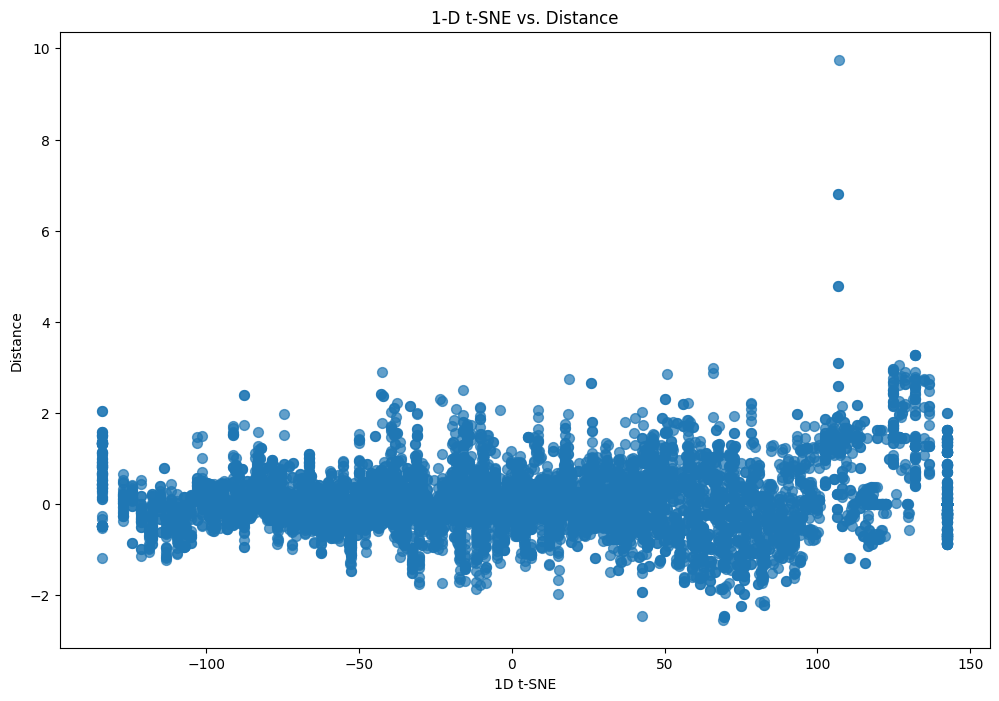

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

def plot_1d_tsne_with_sdistances(dataset, embeddings_key, sdistances_key, output_file=None, dot_size=100):
    # Extract embeddings and sdistances
    embeddings = []
    sdistances = []
    
    for item in dataset:
        for model, embedding in item[embeddings_key].items():
            if isinstance(embedding, np.ndarray):
                embeddings.append(embedding)
                sdistances.append(item['response-sdistances'][model])
    
    embeddings = np.array(embeddings)
    sdistances = np.array(sdistances)
    
    # Perform t-SNE (reducing to 1D)
    tsne = TSNE(n_components=1, random_state=42)
    embeddings_1d = tsne.fit_transform(embeddings).flatten()
    
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        '1D t-SNE': embeddings_1d,
        'Distance': sdistances
    })
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(df['1D t-SNE'], df['Distance'], s=dot_size, alpha=0.7)
    plt.title('1-D t-SNE vs. Distance')
    plt.xlabel('1D t-SNE')
    plt.ylabel('Distance')
    
    # Save to file if specified
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

# Example usage with dot size of 50
plot_1d_tsne_with_sdistances(
    dataset=filtered_bdx,
    embeddings_key='embeddings',  # or 'embeddings' depending on how your data is structured
    sdistances_key='response-sdistances',
    output_file='1d_tsne_vs_distances.png',
    dot_size=50
)


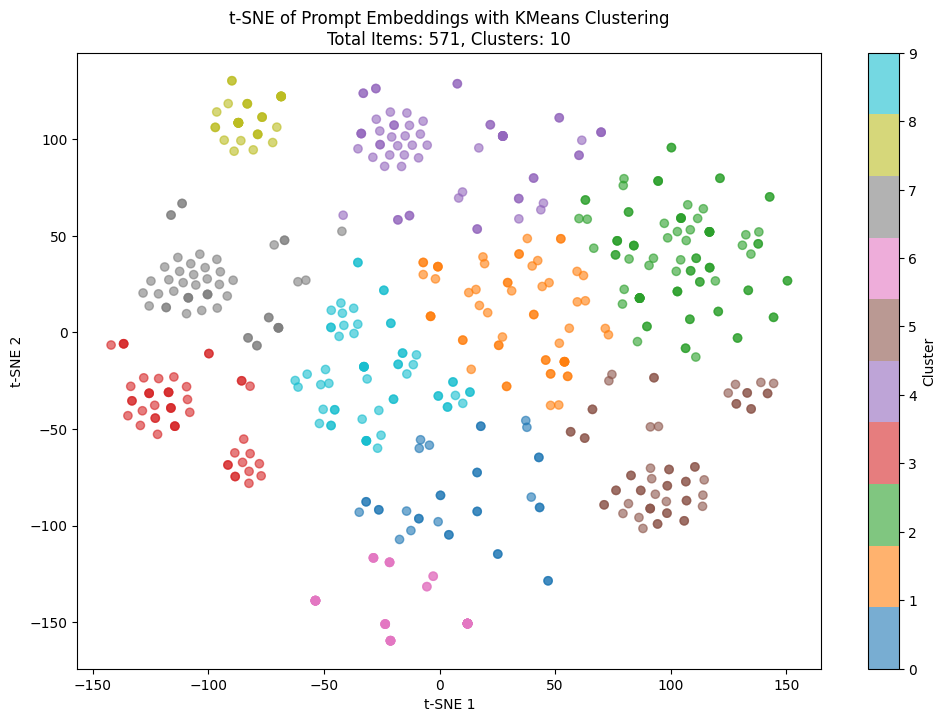

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def plot_tsne_kmeans_clusters(dataset, embed_key='prompt-embed', n_clusters=10, output_file='tsne_kmeans_clusters.png'):
    # Extract prompt-embed vectors
    embeddings = []
    labels = []
    
    for item in dataset:
        embeddings.append(item[embed_key])
        labels.append(item.get('label', 'Unknown'))  # Adjust this if your dataset has labels

    embeddings = np.array(embeddings)
    num_items = len(embeddings)

    # Perform t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=6)
    tsne_result = tsne.fit_transform(embeddings)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(tsne_result)

    # Create a DataFrame for the scatter plot
    df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
    df['Cluster'] = clusters
    df['Label'] = labels

    # Plot the results
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['Cluster'], cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f't-SNE of Prompt Embeddings with KMeans Clustering\nTotal Items: {num_items}, Clusters: {n_clusters}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')

    # Save the plot
    plt.savefig(output_file)
    plt.show()

# Example usage
plot_tsne_kmeans_clusters(
    dataset=filtered_bdx,
    embed_key='prompt-embed',
    n_clusters=10,
    output_file='tsne_kmeans_clusters.png'
)


In [ ]:
def list_responses_with_sdistance_zero(dataset, model_name):
    responses_with_sdistance_zero = []
    
    for item in dataset:
        # Check if the model exists in the item
        if model_name in item['response-sdistances']:
            # Get the sdistance for the model
            sdistance = item['response-sdistances'][model_name]
            
            # If sdistance is 0, collect the response
            if abs(sdistance) < 0.01:
                responses_with_sdistance_zero.append((model_name, item['conversation'][0]['content'], item['conversation'][1]['content'], item['compare'][model_name]))
    
    return responses_with_sdistance_zero

# Example usage
model_name = 'claude3opus'  # Replace with the model of interest
responses = list_responses_with_sdistance_zero(filtered_bdx, model_name)

print(f"Responses for model '{model_name}' with abs sdistance of <0.01:")
for response in responses:
    print(response)


137

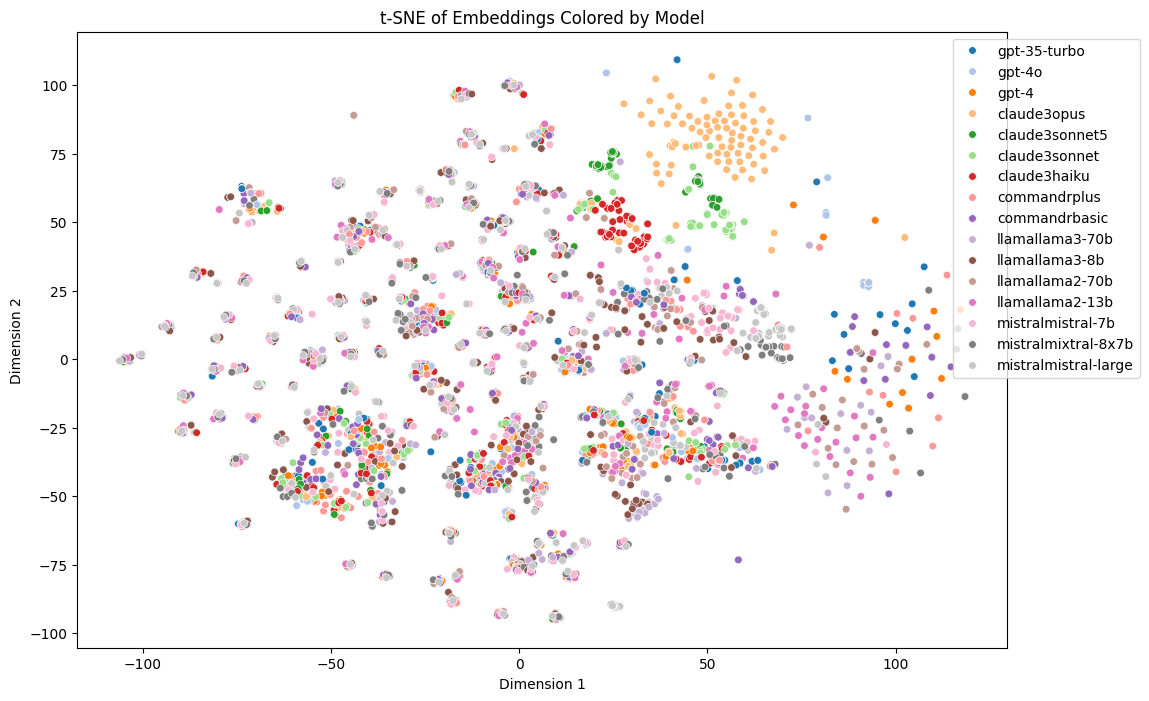

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

class TSNEPlotter:
    def __init__(self, dataset, key_name):
        """
        Initializes the TSNEPlotter with the dataset and key name for embeddings.
        
        Parameters:
        - dataset: List of dictionaries containing embeddings and prompts.
        - key_name: Key in the dictionary where embeddings are stored.
        """
        self.dataset = dataset
        self.key_name = key_name
        self.df = None
        self.tsne_results = None
        self._compute_tsne()

    def _compute_tsne(self):
        """Computes t-SNE and stores the results in a DataFrame."""
        # Extract embeddings, model labels, and prompts
        embeddings = []
        labels = []
        prompts = []

        for item in self.dataset:
            for model, embedding in item[self.key_name].items():
                if isinstance(embedding, np.ndarray):
                    embeddings.append(embedding)
                    labels.append(model)
                    prompts.append(str(f"{model} \n {item['conversation'][0]['content']} \n {item['conversation'][1]['content']} \n {item['compare'][model]}"))  # Assume 'response' is the prompt field

        embeddings = np.array(embeddings)
        labels = np.array(labels)
        prompts = np.array(prompts)

        # Perform t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        embeddings_2d = tsne.fit_transform(embeddings)
        
        # Store the t-SNE results in a DataFrame
        self.df = pd.DataFrame({
            'Dimension 1': embeddings_2d[:, 0],
            'Dimension 2': embeddings_2d[:, 1],
            'Model': labels,
            'Prompt': prompts
        })
        self.tsne_results = embeddings_2d

    def plot_tsne(self, output_file=None):
        """Plots the t-SNE results."""
        if self.df is None:
            raise ValueError("t-SNE has not been computed yet.")
        
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=self.df, x='Dimension 1', y='Dimension 2', hue='Model', palette='tab20', s=30)
        plt.title('t-SNE of Embeddings Colored by Model')
        plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        if output_file:
            plt.savefig(output_file, bbox_inches='tight')
        else:
            plt.show()

    def get_prompts_within_bounds(self, bounds):
        """
        Returns prompts within the specified bounded area.
        
        Parameters:
        - bounds: Dictionary with keys 'x_min', 'x_max', 'y_min', 'y_max' to specify the area of interest.
        
        Returns:
        - List of prompts within the specified bounds.
        """
        if self.df is None:
            raise ValueError("t-SNE has not been computed yet.")
        
        x_min, x_max = bounds.get('x_min', -np.inf), bounds.get('x_max', np.inf)
        y_min, y_max = bounds.get('y_min', -np.inf), bounds.get('y_max', np.inf)
        
        within_bounds = (self.df['Dimension 1'] >= x_min) & (self.df['Dimension 1'] <= x_max) & \
                        (self.df['Dimension 2'] >= y_min) & (self.df['Dimension 2'] <= y_max)
        
        prompts_within_bounds = self.df.loc[within_bounds, 'Prompt'].tolist()
        return prompts_within_bounds

# Example usage
plotter = TSNEPlotter(
    dataset=filtered_bdx,
    key_name='embeddings'
)

# Plot the t-SNE results
plotter.plot_tsne(output_file='tsne_embeddings.png')

# Query prompts within specified bounds
bounds = {
    'x_min': -10,
    'x_max': 10,
    'y_min': -10,
    'y_max': 10
}
prompts = plotter.get_prompts_within_bounds(bounds)
len(prompts)


In [ ]:
bounds = {
    'x_min': 30,
    'x_max': 60,
    'y_min': 60,
    'y_max': 100
}
plotter.get_prompts_within_bounds(bounds)
# confirming that the prompts Claude answers differently on are the jailbreaking prompts

In [ ]:
bounds = {
    'x_min': 50,
    'x_max': 100,
    'y_min': -60,
    'y_max': 10
}
plotter.get_prompts_within_bounds(bounds)
# confirming that the prompts Claude answers differently on are the jailbreaking prompts

In [22]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def plot_tsne_prompt_embeddings(dataset, key_name, k=10, output_file=None):
    # Extract prompt embeddings and prompts
    embeddings = []
    prompts = []
    
    for item in dataset:
        prompt = item['conversation'][0]['content']
        embedding = item.get(key_name, None)
        if isinstance(embedding, np.ndarray):
            embeddings.append(embedding)
            prompts.append(prompt)
    
    embeddings = np.array(embeddings)
    prompts = np.array(prompts)
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Dimension 1': embeddings_2d[:, 0],
        'Dimension 2': embeddings_2d[:, 1],
        'Prompt': prompts,
        'Cluster': clusters
    })
    
    # Plot with Plotly
    fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Cluster',
                     hover_name='Prompt',
                     title=f't-SNE of Prompt Embeddings with KMeans Clustering (k={k}, Total Items={len(df)})')
    
    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_tsne_prompt_embeddings(
    dataset=bdx,
    key_name='prompt-embed',
    k=20,
    output_file='tsne_prompt_embeddings_all.html'
)


In [160]:
bdx[0]['prompt-embed']

array([ 0.7711096 , -0.02275816, -0.07921249, ..., -0.15043205,
        0.29496744, -0.00131077], dtype=float32)

In [56]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

def plot_tsne_responses_gradient(dataset, key_name, output_file=None, exponent=2):
    # Extract embeddings, responses, model names, and sdistances
    embeddings = []
    responses = []
    models = []
    sdistances = []

    for item in dataset:
        for model in item['compare'].keys():
            # The embedding for the given model key
            embedding = item.get(key_name, {}).get(model, {})
            sdistance = item.get('response-sdistances', {}).get(model, {})
            response = item['compare'][model]
            
            if isinstance(embedding, np.ndarray):
                embeddings.append(embedding)
                responses.append(response)
                models.append(model)
                sdistances.append(sdistance)

    embeddings = np.array(embeddings)
    responses = np.array(responses)
    models = np.array(models)
    sdistances = np.array(sdistances)

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Dimension 1': embeddings_2d[:, 0],
        'Dimension 2': embeddings_2d[:, 1],
        'Model': models,
        'Response': responses,
        'Sdistance': sdistances
    })
    sdistances[sdistances == 0] = 0.0001
    exp_sdistances = np.abs(np.reciprocal(sdistances))
    exp_sdistances[exp_sdistances > 10] = 25

    hovers = [f"{x} {y}" for x, y in zip(df['Model'], df['Response'])]

    # Plot with Plotly
    fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color=exp_sdistances,
                     hover_name='Model',  # Display model name only on hover
                     color_continuous_scale='Plasma',  # Use any color scale
                     title=f't-SNE of Responses Colored by Sdistance (Total Items={len(df)})')

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_tsne_responses_gradient(
    dataset=filtered_bdx,
    key_name='embeddings',
    output_file='tsne_responses_gradient.html',
    exponent="2"
)


In [31]:
len(filtered_bdx)

571

In [63]:
import plotly.express as px
import pandas as pd

def plot_boxplot_responses_sdistances(dataset, key_name, output_file=None):
    # Extract response-sdistances and model names
    sdistances = []
    models = []

    for item in dataset:
        for model, sdistance in item.get('response-sdistances', {}).items():
            if model in item[key_name]:
                sdistances.append(sdistance)
                models.append(model)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Model': models,
        'Sdistance': sdistances
    })

    # Plot with Plotly
    fig = px.box(df, x='Model', y='Sdistance', color='Model',
                 title='Box Plot of Response Sdistances by Model',
                 color_discrete_sequence=px.colors.qualitative.Dark2)

    fig.update_yaxes(range=[-3, 3])
    
    fig.update_layout(
        yaxis_title='Sdistance',
        height=800  # Increase the height as needed
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_boxplot_responses_sdistances(
    dataset=filtered_bdx,
    key_name='compare',  # Assuming 'compare' is the key that includes the models
    output_file='boxplot_responses_sdistances.html'
)


In [71]:
import plotly.express as px
import pandas as pd

def plot_violinplot_responses_sdistances(dataset, key_name, output_file=None):
    # Extract response-sdistances and model names
    sdistances = []
    models = []

    for item in dataset:
        for model, sdistance in item.get('response-sdistances', {}).items():
            if model in item[key_name]:
                sdistances.append(sdistance)
                models.append(model)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Model': models,
        'Sdistance': sdistances
    })

    # Calculate mean Sdistance for each model
    model_means = df.groupby('Model')['Sdistance'].mean().sort_values()
    sorted_models = model_means.index

    # Reorder DataFrame according to sorted models
    df['Model'] = pd.Categorical(df['Model'], categories=sorted_models, ordered=True)
    df = df.sort_values('Model')

    # Plot with Plotly
    fig = px.violin(df, x='Model', y='Sdistance', color='Model',
                    title='Violin Plot of Response Sdistances by Model',
                    color_discrete_sequence=px.colors.qualitative.Dark2,
                    box=True, # Add box plot inside the violin plot
                    points='all') # Show all data points

    fig.update_yaxes(range=[-3, 3])
    
    fig.update_layout(
        yaxis_title='Sdistance',
        height=800  # Increase the height as needed
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_violinplot_responses_sdistances(
    dataset=filtered_bdx,
    key_name='compare',  # Assuming 'compare' is the key that includes the models
    output_file='violinplot_responses_sdistances.html'
)


In [72]:
import plotly.express as px
import pandas as pd

def plot_scatter_ldistance_vs_sdistance(dataset, key_name, output_file=None):
    # Extract ldistance, sdistance, and model names
    ldistances = []
    sdistances = []
    models = []

    for item in dataset:
        for model in item.get('response-sdistances', {}):
            if model in item[key_name]:
                ldistance = item.get('response-ldistances', {}).get(model)
                sdistance = item.get('response-sdistances', {}).get(model)
                if ldistance is not None and sdistance is not None:
                    ldistances.append(ldistance)
                    sdistances.append(sdistance)
                    models.append(model)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Model': models,
        'Ldistance': ldistances,
        'Sdistance': sdistances
    })

    # Plot with Plotly
    fig = px.scatter(df, x='Ldistance', y='Sdistance', color='Model',
                     title='Scatter Plot of Ldistance vs Sdistance by Model',
                     color_discrete_sequence=px.colors.qualitative.Dark2)

    fig.update_layout(
        xaxis_title='Ldistance',
        yaxis_title='Sdistance',
        height=800  # Increase the height as needed
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_scatter_ldistance_vs_sdistance(
    dataset=filtered_bdx,
    key_name='compare',  # Assuming 'compare' is the key that includes the models
    output_file='scatter_ldistance_vs_sdistance.html'
)


In [74]:
import plotly.express as px
import pandas as pd

def plot_scatter_ldistance_vs_sdistance_per_model(dataset, key_name, output_dir=None):
    # Extract ldistance, sdistance, and model names
    ldistances = []
    sdistances = []
    models = []

    for item in dataset:
        for model in item.get('response-sdistances', {}):
            if model in item[key_name]:
                ldistance = item.get('response-ldistances', {}).get(model)
                sdistance = item.get('response-sdistances', {}).get(model)
                if ldistance is not None and sdistance is not None:
                    ldistances.append(ldistance)
                    sdistances.append(sdistance)
                    models.append(model)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Model': models,
        'Ldistance': ldistances,
        'Sdistance': sdistances
    })

    # Get unique models
    unique_models = df['Model'].unique()

    # Generate a scatter plot for each model
    for model in unique_models:
        model_df = df[df['Model'] == model]

        fig = px.scatter(model_df, x='Ldistance', y='Sdistance',
                         title=f'Scatter Plot of Ldistance vs Sdistance for Model: {model}',
                         color_discrete_sequence=[px.colors.qualitative.Dark2[0]])

        fig.update_layout(
            xaxis_title='Ldistance',
            yaxis_title='Sdistance',
            height=800  # Increase the height as needed
        )

        # Save to file if specified
        if output_dir:
            output_file = f'scatter_ldistance_vs_sdistance_{model}.html'
            fig.write_html(output_file)
        else:
            fig.show()

# Example usage
plot_scatter_ldistance_vs_sdistance_per_model(
    dataset=filtered_bdx,
    key_name='compare',  # Assuming 'compare' is the key that includes the models
    output_dir='plots'  # Directory to save the plots
)


In [77]:
import plotly.express as px
import pandas as pd

def plot_boxplot_responses_ldistances(dataset, key_name, output_file=None):
    # Extract response-ldistances and model names
    ldistances = []
    models = []

    for item in dataset:
        for model, ldistance in item.get('response-ldistances', {}).items():
            if model in item[key_name]:
                ldistances.append(ldistance)
                models.append(model)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Model': models,
        'Ldistance': ldistances
    })

    # Plot with Plotly
    fig = px.box(df, x='Model', y='Ldistance', color='Model',
                 title='Box Plot of Response Levenshtein Distances by Model',
                 color_discrete_sequence=px.colors.qualitative.Dark2)

    fig.update_yaxes(range=[0, 11000])
    
    fig.update_layout(
        yaxis_title='Ldistance',
        height=800  # Increase the height as needed
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_boxplot_responses_ldistances(
    dataset=filtered_bdx,
    key_name='compare',  # Assuming 'compare' is the key that includes the models
    output_file='boxplot_responses_ldistances.html'
)


In [79]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def plot_tsne_kmeans_clusters(dataset, embed_key='prompt-embed', n_clusters=10, output_file=None):
    # Extract prompt-embed vectors and prompts
    embeddings = []
    labels = []
    prompts = []

    for item in dataset:
        embeddings.append(item[embed_key])
        labels.append(item.get('label', 'Unknown'))  # Adjust this if your dataset has labels
        prompts.append(item.get('conversation', [{}])[0].get('content', 'No Prompt'))  # Extracting prompt text

    embeddings = np.array(embeddings)
    num_items = len(embeddings)

    # Perform t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=6)
    tsne_result = tsne.fit_transform(embeddings)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(tsne_result)

    # Create a DataFrame for the scatter plot
    df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
    df['Cluster'] = clusters
    df['Label'] = labels
    df['Prompt'] = prompts

    # Plot with Plotly
    fig = px.scatter(df, x='TSNE1', y='TSNE2', color='Cluster', 
                     hover_name='Prompt',  # Show the prompt on hover
                     title=f't-SNE of Prompt Embeddings with KMeans Clustering\nTotal Items: {num_items}, Clusters: {n_clusters}',
                     color_continuous_scale=px.colors.sequential.Viridis)

    fig.update_layout(
        xaxis_title='t-SNE 1',
        yaxis_title='t-SNE 2',
        height=800,  # Increase the height as needed
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_tsne_kmeans_clusters(
    dataset=filtered_bdx,
    embed_key='prompt-embed',
    n_clusters=10,
    output_file='tsne_kmeans_clusters.html'  # Use HTML to preserve interactivity
)


In [86]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

def plot_tsne_no_clustering(dataset, embed_key='prompt-embed', output_file=None):
    # Extract prompt-embed vectors and prompts
    embeddings = []
    prompts = []
    has_compare = []

    for item in dataset:
        if any(item.get(embed_key, [])):
            embeddings.append(item[embed_key])
            prompts.append(item.get('conversation', [{}])[0].get('content', 'No Prompt'))  # Extracting prompt text
            has_compare.append(1 if item.get('compare') else 0)  # 1 if 'compare' is not empty, 0 otherwise

    embeddings = np.array(embeddings)
    num_items = len(embeddings)

    # Perform t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=6)
    tsne_result = tsne.fit_transform(embeddings)

    # Create a DataFrame for the scatter plot
    df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
    df['Has Compare'] = has_compare
    df['Prompt'] = prompts

    # Plot with Plotly
    fig = px.scatter(df, x='TSNE1', y='TSNE2', color='Has Compare', 
                     color_continuous_scale=px.colors.sequential.Viridis,
                     hover_name='Prompt',
                     size_max=5,  # Set maximum size of the dots
                     title=f't-SNE of Prompt Embeddings\nTotal Items: {num_items}',
                     labels={'Has Compare': 'Has Compare (1: Yes, 0: No)'})

    fig.update_layout(
        xaxis_title='t-SNE 1',
        yaxis_title='t-SNE 2',
        height=800,  # Increase the height as needed
        showlegend=True
    )

    # Save to file if specified
    if output_file:
        fig.write_html(output_file)
    else:
        fig.show()

# Example usage
plot_tsne_no_clustering(
    dataset=bdx,
    embed_key='prompt-embed',
    output_file='tsne_no_clustering.html'  # Use HTML to preserve interactivity
)


In [116]:
def search_term_in_dataset(dataset, search_term, embed_key='conversation'):
    """
    Search for a specific term in the prompts and responses of the dataset and print them, including responses from 'compare' field if available.

    :param dataset: The dataset containing the prompts and responses.
    :param search_term: The term to search for within the prompts and responses.
    :param embed_key: The key used to access the conversation data in the dataset.
    """
    # Convert search term to lowercase for case-insensitive search
    search_term_lower = search_term.lower()
    res=""
    # Iterate through each item in the dataset
    for item in dataset:
        # Extract the prompt text
        prompt = item.get(embed_key, [{}])[0].get('content', '')

        # Check for the search term in the prompt
        if search_term_lower in prompt.lower():
            # Extract the response text
            response = item.get(embed_key, [{}])[0].get('response', 'No response available')
            
            
            # Print the prompt and response
            res+= f"Prompt: {prompt}\n"
            res+=  f"Response: {response}"

            # Check if 'compare' field is available
            compare_responses = item.get('compare', {})
            
            if compare_responses:
                res+="Compare Responses:\n"
                for model, compare_response in compare_responses.items():
                    res+=f"Model: {model}\n"
                    res+=f"  Response: {compare_response}\n"
            else:
                print("No compare responses available")

            res+="\n"  # Add a newline for better readability
    return res

# Example usage
r = search_term_in_dataset(filtered_bdx, search_term=' summar')
with open('summarize.txt', 'w') as f:
    f.write(r)

In [112]:
filtered_bdx[0]['compare'].keys()

dict_keys(['gpt-35-turbo', 'gpt-4o', 'gpt-4', 'claude3opus', 'claude3sonnet5', 'claude3sonnet', 'claude3haiku', 'commandrplus', 'commandrbasic', 'llamallama3-70b', 'llamallama3-8b', 'llamallama2-70b', 'llamallama2-13b', 'mistralmistral-7b', 'mistralmixtral-8x7b', 'mistralmistral-large'])